In [ ]:
Task-6: Time Series Analysis 

In [ ]:
Objective 
Analyze sales data over time and forecast future sales using statistical models.

In [ ]:
1. Dataset Selection 
● The dataset should include at least two columns: 
○ Date: The timestamp of the recorded sales. 
○ Sales: The number of units sold or revenue on that date. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
Sample Data Generation

In [5]:
# Sample Sales Data
df_sales = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'Sales': [100, 120, 130, 150, 170, 200, 190, 210, 230, 240]
})
df_sales.to_csv('sales_data.csv', index=False)



In [ ]:
# Sample Heart Disease Data
df_heart = pd.DataFrame({
    'Age': [45, 50, 60, 40, 55, 65, 35, 70, 48, 52],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Cholesterol': [220, 190, 250, 180, 210, 240, 160, 270, 200, 185],
    'Blood Pressure': [140, 130, 160, 120, 150, 170, 110, 180, 135, 125],
    'Heart Disease': [1, 0, 1, 0, 1, 1, 0, 1, 0, 0]
})
df_heart.to_csv('heart_disease.csv', index=False)

In [ ]:
Task 1: Time Series Analysis 

In [7]:
# Load the dataset
df_sales = pd.read_csv('sales_data.csv', parse_dates=['Date'], index_col='Date')
df_sales.sort_index(inplace=True)

In [87]:
df_sales

,Sales,Sales_diff
2023-01-01,20.0,NaN
2023-01-02,20.0,20.0
2023-01-03,10.0,10.0
2023-01-04,20.0,20.0
2023-01-05,20.0,20.0
2023-01-06,30.0,30.0
2023-01-07,-10.0,-10.0
2023-01-08,20.0,20.0
2023-01-09,20.0,20.0
2023-01-10,10.0,10.0


In [ ]:
2. Tasks to Perform

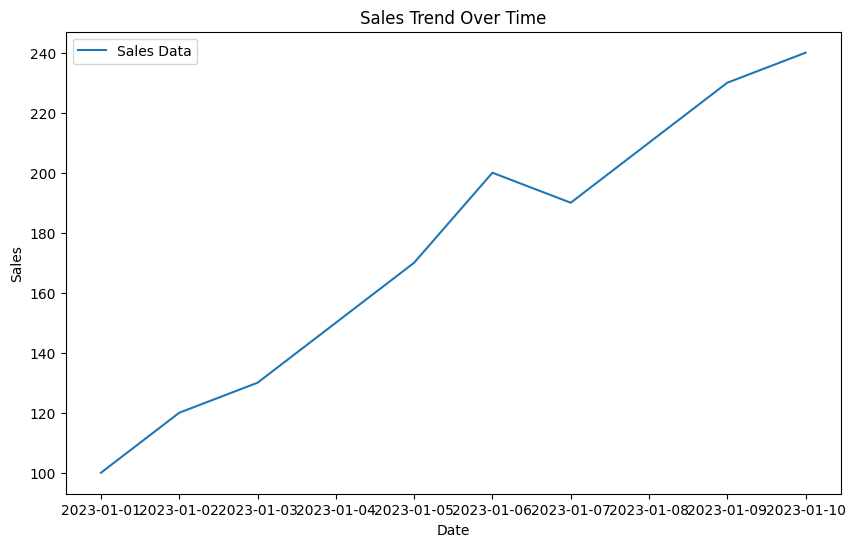

In [9]:
# Visualize sales trends
plt.figure(figsize=(10, 6))
plt.plot(df_sales['Sales'], label='Sales Data')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [47]:
# ARIMA Model
model = ARIMA(df_sales['Sales'], order=(5, 1, 0), enforce_stationarity=True, enforce_invertibility=True)
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)  # Forecast for 30 future days

F:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
3. Deliverables

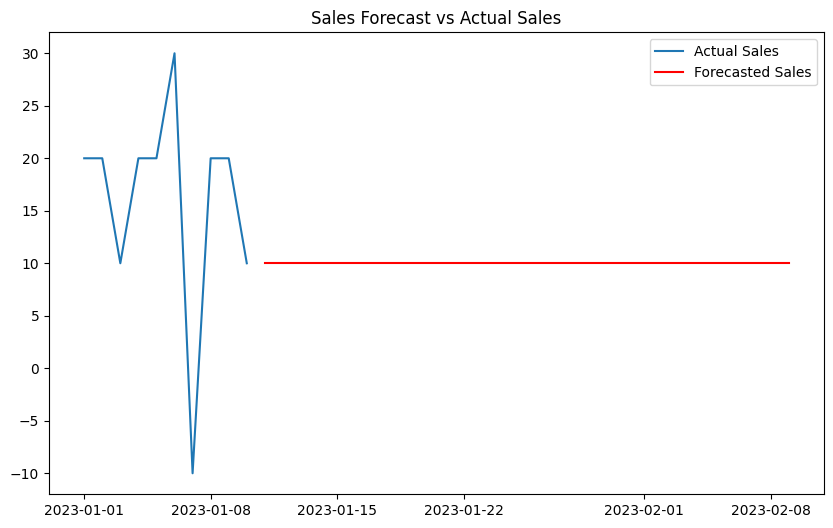

In [51]:
# Forecast plot
plt.figure(figsize=(10, 6))
plt.plot(df_sales['Sales'], label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast vs Actual Sales')
plt.legend()
plt.show()

In [65]:
# Handle potential NaN values in the original dataset
df_sales['Sales'].fillna(method='bfill', inplace=True)
df_sales['Sales'].fillna(method='ffill', inplace=True)

# Forecast adjustment for limited data
forecast = model_fit.forecast(steps=len(df_sales))  # Forecast for available data size

# Evaluation
print(f'RMSE: {np.sqrt(mean_squared_error(df_sales['Sales'], forecast)):.2f}')
print(f'MAPE: {mean_absolute_percentage_error(df_sales['Sales'], forecast):.2%}')



RMSE: 11.83
MAPE: 56.67%


C:\Users\Admin\AppData\Local\Temp\ipykernel_17248\3357606286.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sales['Sales'].fillna(method='bfill', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17248\3357606286.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sales['Sales'].fillna(method='ffill', inplace=True)


In [ ]:
Task 2: Heart Disease Prediction

In [83]:
df_heart = pd.read_csv('heart_disease.csv')

In [85]:
df_heart

,Age,Gender,Cholesterol,Blood Pressure,Heart Disease
0,45,Male,220,140,1
1,50,Female,190,130,0
2,60,Male,250,160,1
3,40,Female,180,120,0
4,55,Male,210,150,1
5,65,Female,240,170,1
6,35,Male,160,110,0
7,70,Female,270,180,1
8,48,Male,200,135,0
9,52,Female,185,125,0


In [69]:
# Data Cleaning
df_heart.dropna(inplace=True)
df_heart.drop_duplicates(inplace=True)

In [71]:
# Feature Engineering
features = ['Age', 'Cholesterol', 'Blood Pressure']
df_heart[features] = (df_heart[features] - df_heart[features].mean()) / df_heart[features].std()

In [73]:
# Train-Test Split
X = df_heart.drop('Heart Disease', axis=1)
y = df_heart['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
# Encode 'Gender' Column
df_heart['Gender'] = df_heart['Gender'].map({'Male': 0, 'Female': 1})

# Train-Test Split
X = df_heart.drop('Heart Disease', axis=1)
y = df_heart['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6666666666666666
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[1 1]
 [0 1]]


In [81]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6666666666666666
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[1 1]
 [0 1]]
